## 04 - Multinomial Logistic Regression

Dataset link: https://www.kaggle.com/lctc12/dataset-wine?select=wine.csv


About data: 
          
          Analyse the information given in the following ‘Wines’ dataset and classify the wine based on their place of origin.This data contains the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. Data variables: Alcohol Malic acid Ash Alkalinityof ash Magnesium Total phenols Flavanoids Nonflavanoid phenols Proanthocyanins Color intensity Hue OD280/OD315 of diluted wines Prolin

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"F:\Priyanaka\Dataset\wine.csv",header=0)
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.shape

(178, 14)

In [4]:
df.size

2492

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
## check missing value
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [7]:
## there is no missing value

In [8]:
df.Wine.unique()

array([1, 2, 3], dtype=int64)

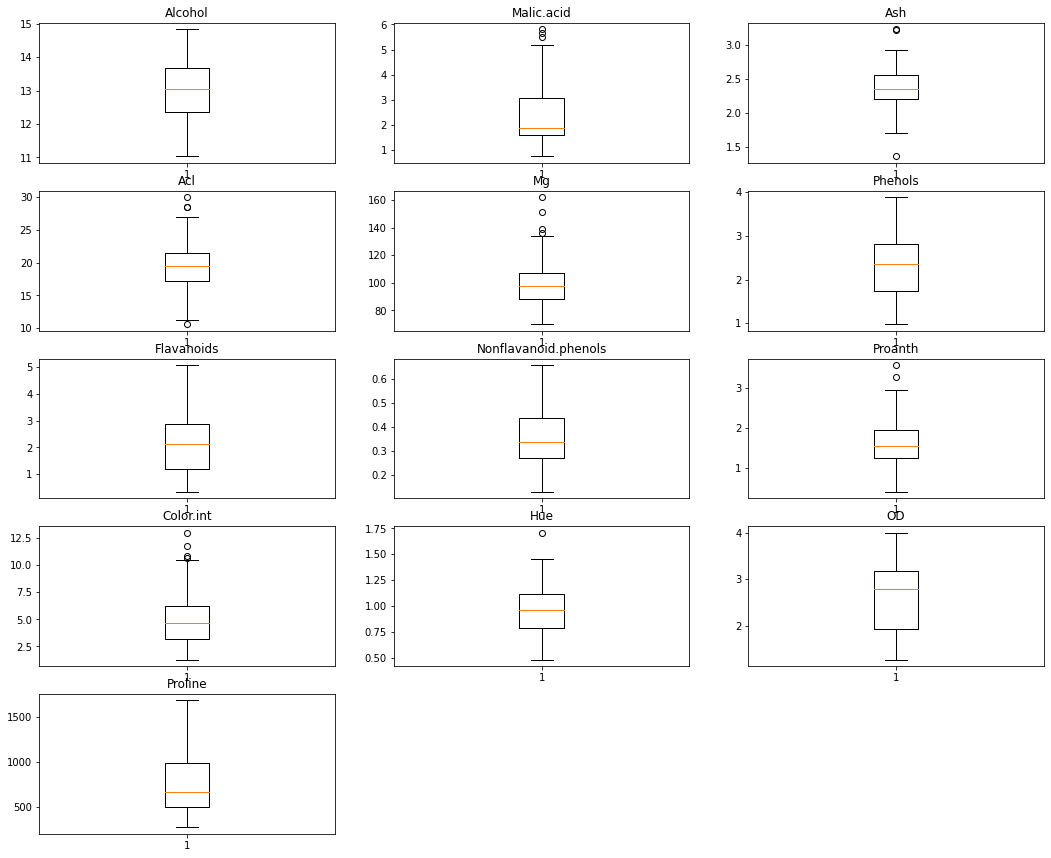

In [9]:
## detecting outlier

def detect_outlier():
    count = 1
    plt.figure(figsize=(18,18))
    for col in df.columns[1:]:
        plt.subplot(6,3,count)
        plt.boxplot(df[col])
        plt.title(col)
        count += 1
        
plt.show()
detect_outlier()

In [10]:
#removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
for col in df.columns:
    df = remove_outlier(df,col)

In [11]:
## after removing outlier
df.shape

(161, 14)

In [12]:
#seperating X and y
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [13]:
#splitting in training and testing values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [14]:
##Model Building
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cg',multi_class='multinomial')

In [15]:
model.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [16]:
#predictions
y_pred = model.predict(X_test)

In [17]:
##Model Evaluation
from sklearn.metrics import confusion_matrix,accuracy_score

In [18]:
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  1,  8]], dtype=int64)

In [19]:
accuracy_score(y_test,y_pred)

0.9393939393939394

we got 93.93% accuracy score